Dataset Overview:
Shape: (66, 25)

First 5 rows:
   SUMLEV REGION DIVISION  STATE              NAME  ESTIMATESBASE2020  \
0      10      0        0      0     United States          331449520   
1      20      1        0      0  Northeast Region           57609156   
2      30      1        1      0       New England           15116206   
3      30      1        2      0   Middle Atlantic           42492950   
4      20      2        0      0    Midwest Region           68985537   

   POPESTIMATE2020  POPESTIMATE2021  POPESTIMATE2022  NPOPCHG_2020  ...  \
0        331511512        332031554        333287557         61992  ...   
1         57448898         57259257         57040406       -160258  ...   
2         15074473         15121745         15129548        -41733  ...   
3         42374425         42137512         41910858       -118525  ...   
4         68961043         68836505         68787595        -24494  ...   

   NRANK_ESTBASE2020  NRANK_POPEST2020  NRANK_POPEST2021  NRA

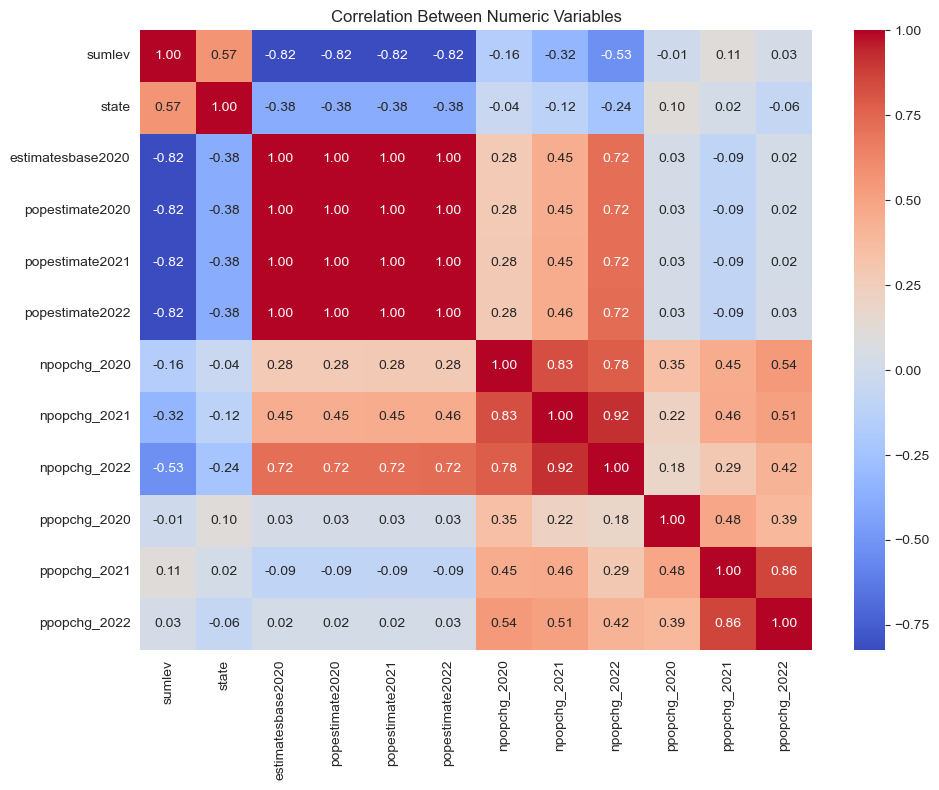

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load data from URL
url = 'https://gist.githubusercontent.com/mattkram/d3880a3a23ca36ccf10f22c1f49adb29/raw/f4602d2b9a17eb0d17355897264f4bad80c5528f/NST-EST2022-POPCHG2020_2022.csv'
df = pd.read_csv(url)

# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

# Clean column names (remove spaces, make lowercase)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic data analysis
# 1. Top 5 states by population in 2022
if 'april_1,_2020_estimates_base' in df.columns and 'july_1,_2022_population_estimate' in df.columns:
    # Extract states (excluding regions/divisions)
    states_df = df[~df['geographic_area'].str.contains('Region|Division', na=False)]
    states_df = states_df[states_df['geographic_area'] != 'United States']
    
    # Sort by 2022 population
    top_states = states_df.sort_values('july_1,_2022_population_estimate', ascending=False).head(10)
    
    # Visualization 1: Top 10 states by population
    plt.figure(figsize=(12, 6))
    sns.barplot(x='july_1,_2022_population_estimate', y='geographic_area', data=top_states)
    plt.title('Top 10 States by Population (2022)')
    plt.xlabel('Population')
    plt.ylabel('State')
    plt.tight_layout()
    plt.savefig('top_states_population.png')
    
    # Visualization 2: Population change percentage
    if 'percent_change' in df.columns:
        # Top 5 states with highest population growth
        top_growth = states_df.sort_values('percent_change', ascending=False).head(5)
        
        # Top 5 states with population decline
        top_decline = states_df.sort_values('percent_change').head(5)
        
        # Combine for visualization
        change_df = pd.concat([top_growth, top_decline])
        
        plt.figure(figsize=(12, 6))
        bars = sns.barplot(x='percent_change', y='geographic_area', data=change_df)
        
        # Color code: green for growth, red for decline
        for i, bar in enumerate(bars.patches):
            if i < 5:  # First 5 are growth
                bar.set_color('green')
            else:  # Last 5 are decline
                bar.set_color('red')
                
        plt.title('States with Highest Population Growth and Decline (%)')
        plt.xlabel('Percent Change (2020-2022)')
        plt.ylabel('State')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.savefig('population_change.png')

# Correlation analysis (if applicable)
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    plt.figure(figsize=(10, 8))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Numeric Variables')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')

print("\nAnalysis complete! Visualizations saved.")